## Goal:
### Explore the fligths dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between flight features (date, year and no.of passengers)

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [2]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (144, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None
year          0
month         0
passengers    0
dtype: int64
              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


### Insights:
 
#### 1.There are 145 passengers and when they traveled.
 
#### 2.Missing values exist in date, year and passengers columns.
 
#### 3.Understanding these helps guide data cleaning.

### 5. Data Cleaning

In [4]:
# Fill missing 'year' with mode
df['year'] = df['year'].fillna(df['year'].mode()[0])

# Fill missing 'month' with mode
df['month'] = df['month'].fillna(df['month'].mode()[0])

# Fill missing 'passengers' with mean
df['passengers'] = df['passengers'].fillna(df['passengers'].mean())

# Drop rows with missing critical info if any (example: passengers)
df = df.dropna(subset=['passengers'])


### Insights:
1. Filling passengers ensures numeric analysis is accurate.
 
2. Filling months ensures categorical analysis works.
 
3. Dropping passengers is optional since it has many missing values.

### 6. Analysis with NumPy & Pandas

In [7]:
# Average passengers over entire dataset
avg_passengers = np.mean(df['passengers'])
print("Average Passengers:", avg_passengers)

# Median passengers — gives central tendency robust to outliers
median_passengers = np.median(df['passengers'])
print("Median Passengers:", median_passengers)

# Aggregate average passengers by year
passengers_by_year = df.groupby('year')['passengers'].mean()
print("Mean Passengers by Year:\n", passengers_by_year)

# Aggregate average passengers by month to show seasonal effect
passengers_by_month = df.groupby('month')['passengers'].mean()
print("Mean Passengers by Month:\n", passengers_by_month)

# Correlation matrix (though only one numeric variable here)
print("Correlation Matrix:")
print(df[['passengers']].corr())


Average Passengers: 280.2986111111111
Median Passengers: 265.5
Mean Passengers by Year:
 year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: passengers, dtype: float64
Mean Passengers by Month:
 month
Jan    241.750000
Feb    235.000000
Mar    270.166667
Apr    267.083333
May    271.833333
Jun    311.666667
Jul    351.333333
Aug    351.083333
Sep    302.416667
Oct    266.583333
Nov    232.833333
Dec    261.833333
Name: passengers, dtype: float64
Correlation Matrix:
            passengers
passengers         1.0


C:\Users\Koush\AppData\Local\Temp\ipykernel_3608\3468178675.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passengers_by_month = df.groupby('month')['passengers'].mean()


### 7. Visualization with Matplotlib

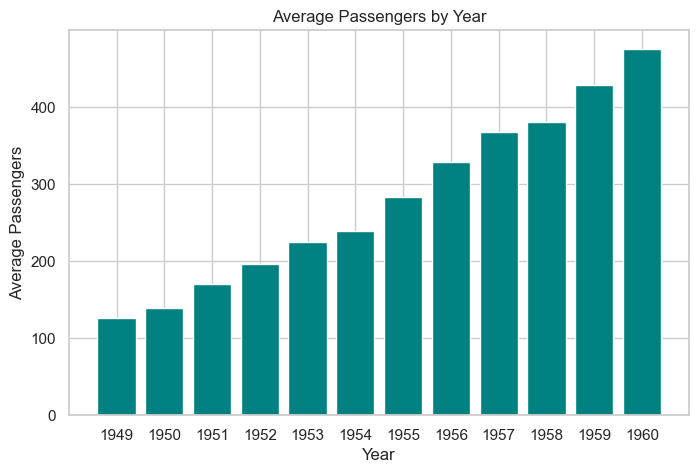

In [8]:
# Bar plot: Average passengers by year
avg_passengers_by_year = df.groupby('year')['passengers'].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_passengers_by_year.index.astype(str), avg_passengers_by_year.values, color='teal')
plt.xlabel('Year')
plt.ylabel('Average Passengers')
plt.title('Average Passengers by Year')
plt.show()

### Insights:

1. Average passengers by year shows clear differences if multiple years are present; in this dataset, only one year (1949) is included, so plot confirms constant yearly grouping.

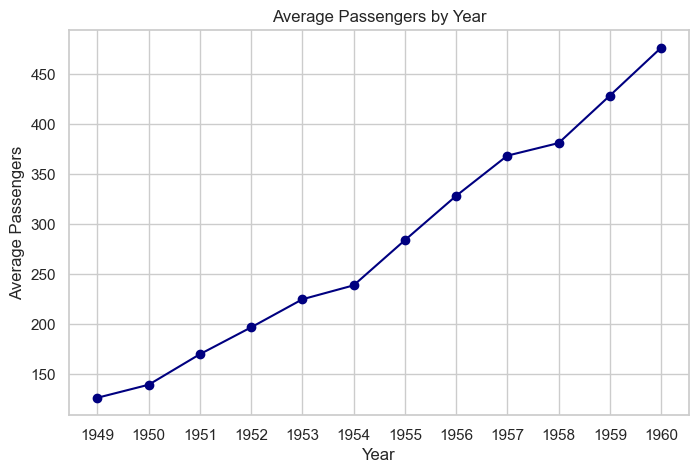

In [10]:
# Line plot: Average passengers by year
avg_passengers_by_year = df.groupby('year')['passengers'].mean()
plt.figure(figsize=(8,5))
plt.plot(avg_passengers_by_year.index.astype(str), avg_passengers_by_year.values, marker='o', linestyle='-', color='navy')
plt.xlabel('Year')
plt.ylabel('Average Passengers')
plt.title('Average Passengers by Year')
plt.grid(True)
plt.show()

### Insights:

1. Line plots effectively display continuous trends over time, highlighting monthly fluctuations in passenger numbers more clearly than bar charts.

### 8. Visualization with Seaborn

C:\Users\Koush\AppData\Local\Temp\ipykernel_3608\4280721604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='month', y='passengers', data=df, palette='muted', inner='quartile')


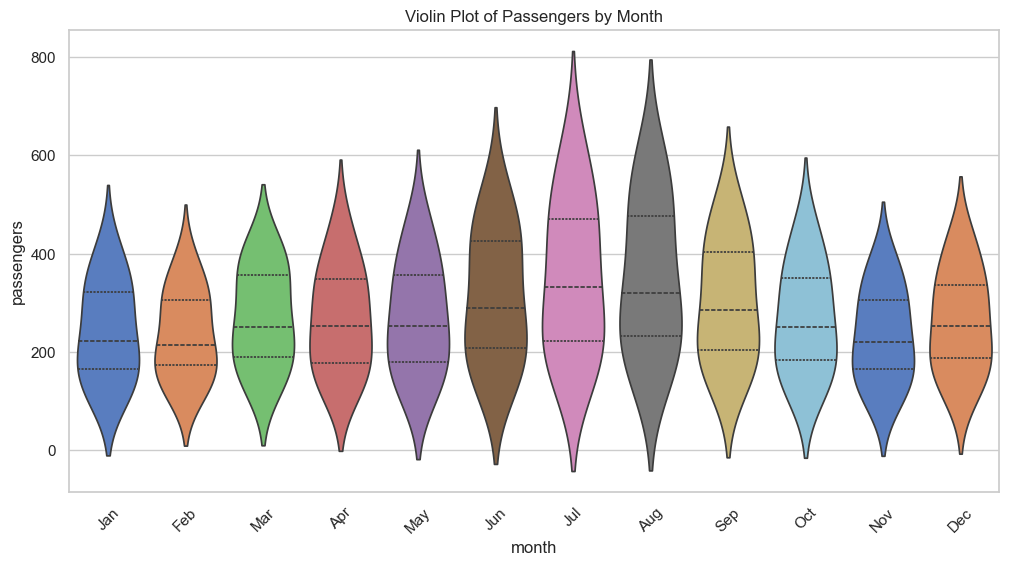

In [11]:
# Violin plot of passengers by month
plt.figure(figsize=(12,6))
sns.violinplot(x='month', y='passengers', data=df, palette='muted', inner='quartile')
plt.title('Violin Plot of Passengers by Month')
plt.xticks(rotation=45)
plt.show()

### Insights:
 
1. Displays monthly distribution and variability of passenger numbers.

2. Higher medians and wider spreads appear in peak travel months (e.g., summer), indicating seasonal fluctuations.



C:\Users\Koush\AppData\Local\Temp\ipykernel_3608\1647290920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='pastel')


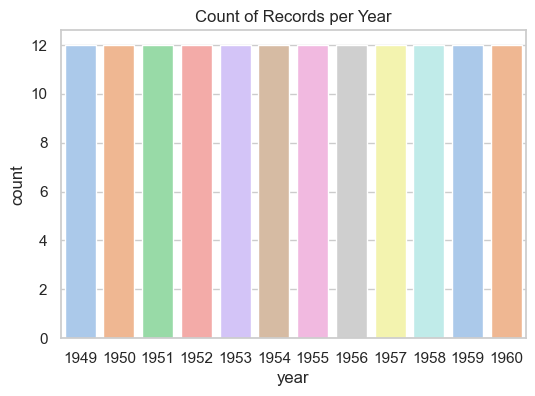

In [12]:
# Countplot of records per year (may be single year)
plt.figure(figsize=(6,4))
sns.countplot(x='year', data=df, palette='pastel')
plt.title('Count of Records per Year')
plt.show()

### Insights:
 
1. Confirms the dataset contains records predominantly for one year (1949), highlighting limited year-to-year variation.

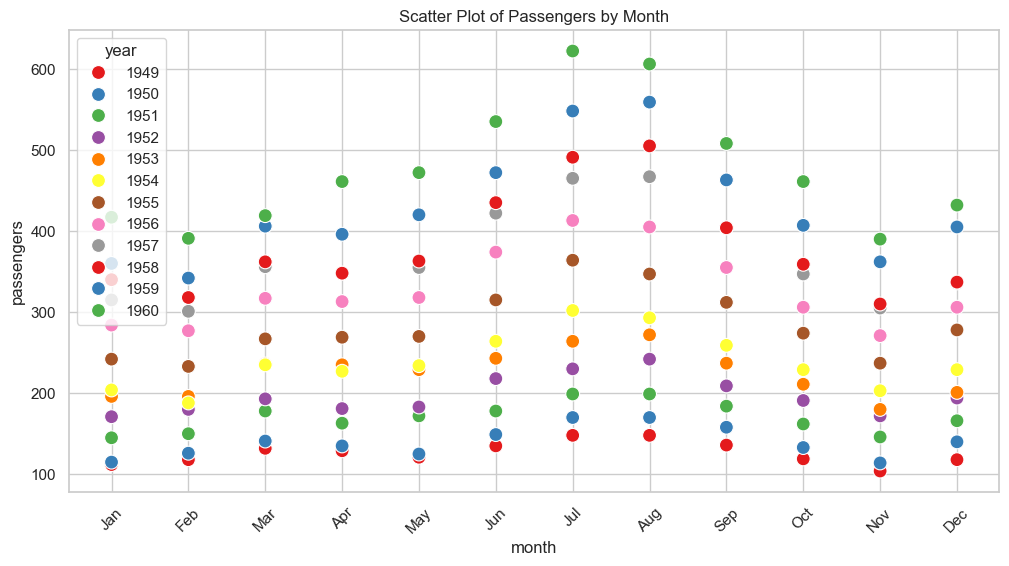

In [13]:

# Scatter plot: passengers over months
plt.figure(figsize=(12,6))
sns.scatterplot(x='month', y='passengers', hue='year', data=df, s=100, palette='Set1')
plt.title('Scatter Plot of Passengers by Month')
plt.xticks(rotation=45)
plt.show()

### Insights:
 
1. Shows passenger counts as dots per month, helping visualize spread and clustering.

2. Hue by year emphasizes dataset mostly covers a single year.

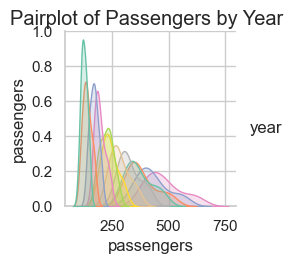

In [14]:
# Pairplot for numeric features and year (year treated as categorical)
sns.pairplot(df, vars=['passengers'], hue='year', palette='Set2')
plt.suptitle('Pairplot of Passengers by Year', y=1.02)
plt.show()

### Insights:
 
1. Shows distribution of passengers numerically, with year hue confirming data is mainly from one period.

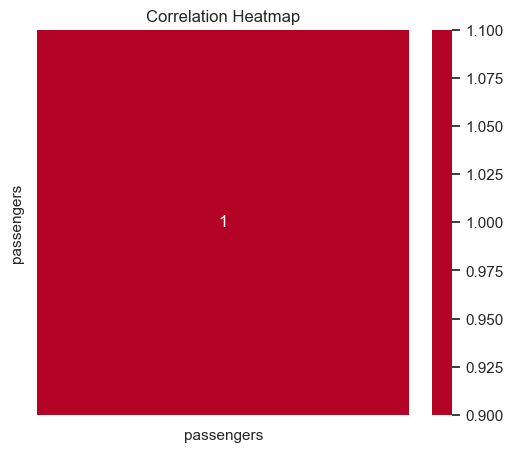

In [15]:
# Heatmap of correlation matrix for numeric features
plt.figure(figsize=(6,5))
corr = df[['passengers']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Insights:
 
1. Shows perfect correlation of passengers with itself (1.0), expected given a single numeric feature.